In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

from pathlib import Path
from optim import TopOpt, Post3D

# Fiberglass

Parts with geometrical function, optimization with volfrac 0.3

- Traditional composite: S-glass + polyester, fiber volume fraction 0.5
- Eco-optimized: bamboo + cellulose, fiber volume fraction 0.5


Compliance : 574.31 N.mm
Mass : 62.46 g
CO2 footprint: 6160.30 kgCO2


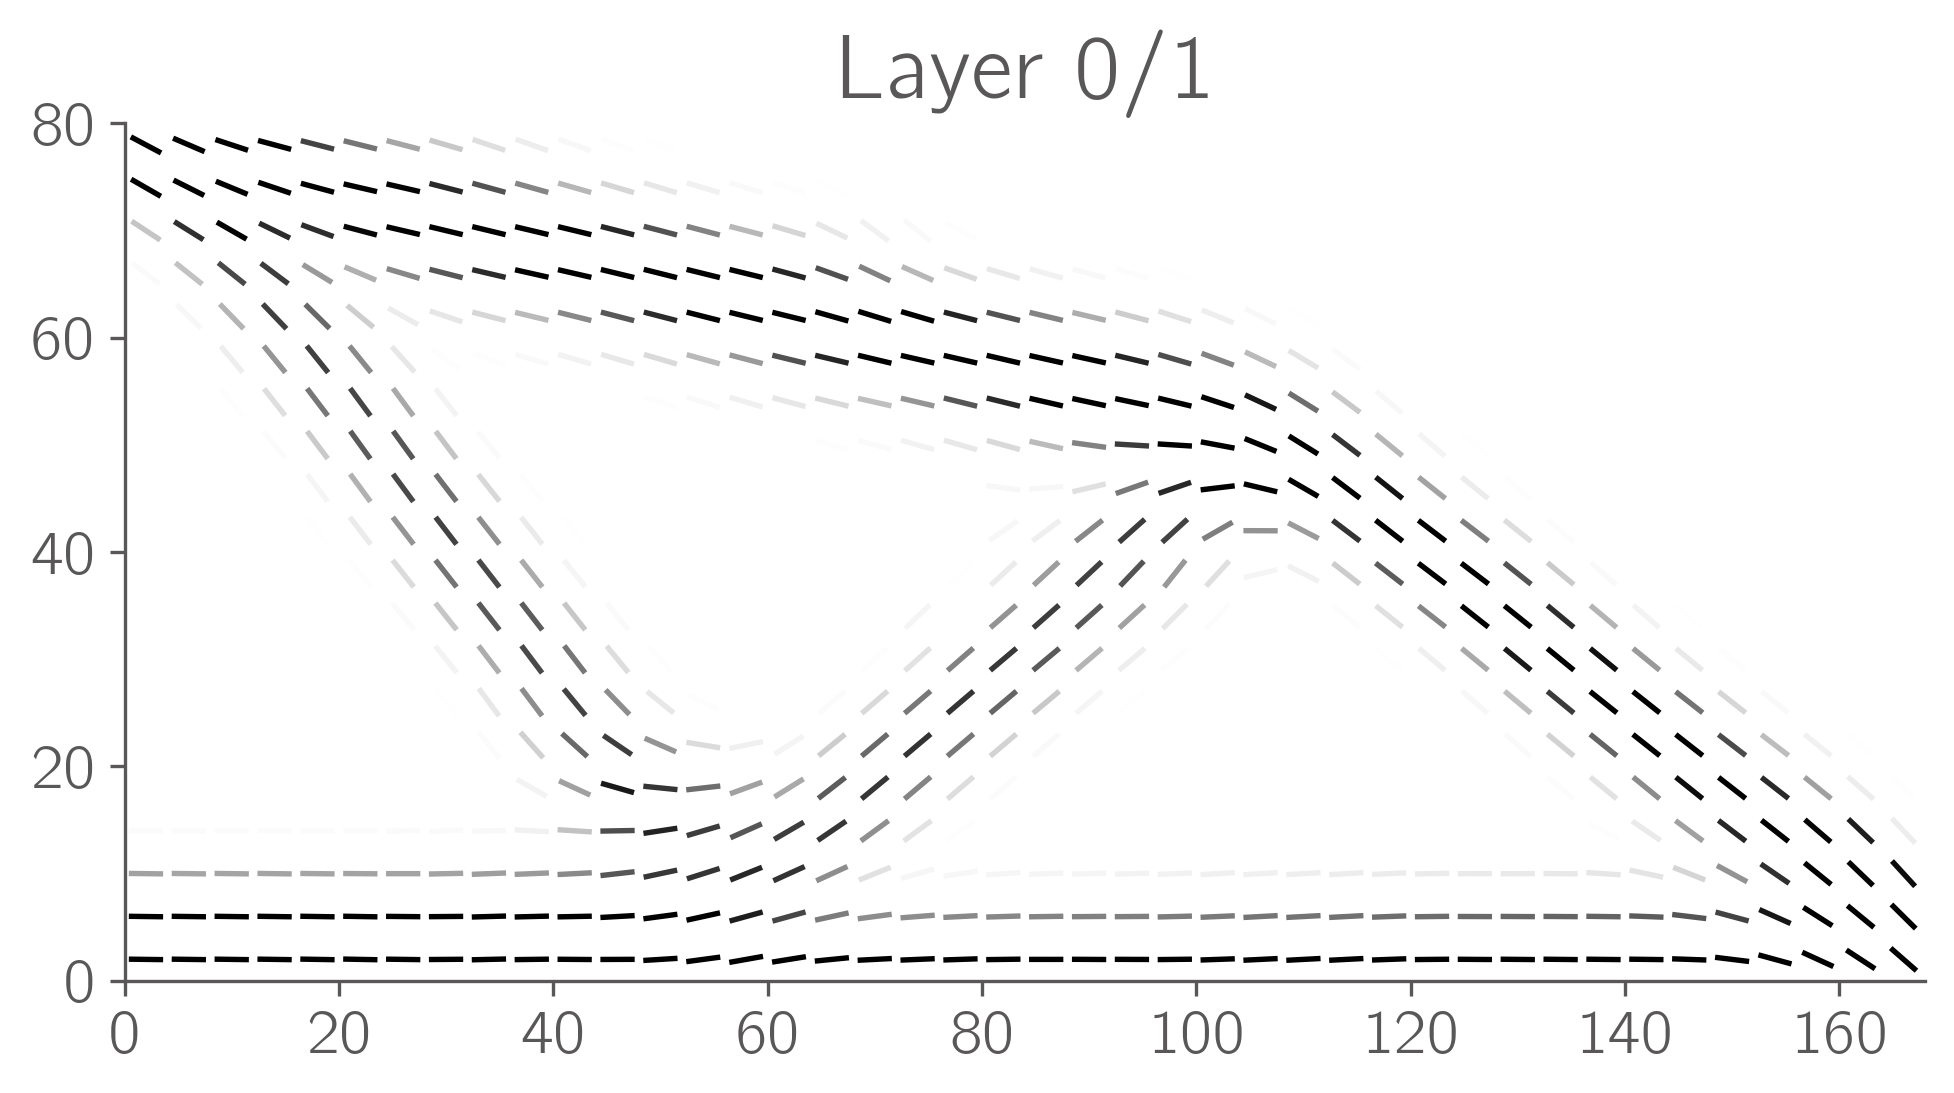

In [3]:
# {t/mm^3, MPa, -, kgCO2/kg}
sglass     = {'rho': 2495e-12, 'E': 89.5e3, 'v': 0.22, 'CO2': 2.905}
polyester  = {'rho': 1385e-12, 'E': 4.55e3, 'v': 0.35, 'CO2': 4.5}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=sglass, matrix=polyester, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

solver = TopOpt(inputfile='models/mbb3d.db', res_dir='results/subs/glass/', dim='3D_layer', jobname='glass', echo=False)
solver.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver.set_volfrac(0.3)
solver.set_filters(r_rho=6, r_theta=10)
solver.set_initial_conditions('random')
solver.set_optim_options(max_iter=200, tol=1e-3, continuation=True)

solver.run()
solver.save()
comp = solver.comp_max_hist[-1]
        
post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.get_mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.get_CO2_footprint(rho, CO2mat, CO2veh)))


Compliance : 2136.22 N.mm
Mass : 27.20 g
CO2 footprint: 2682.72 kgCO2


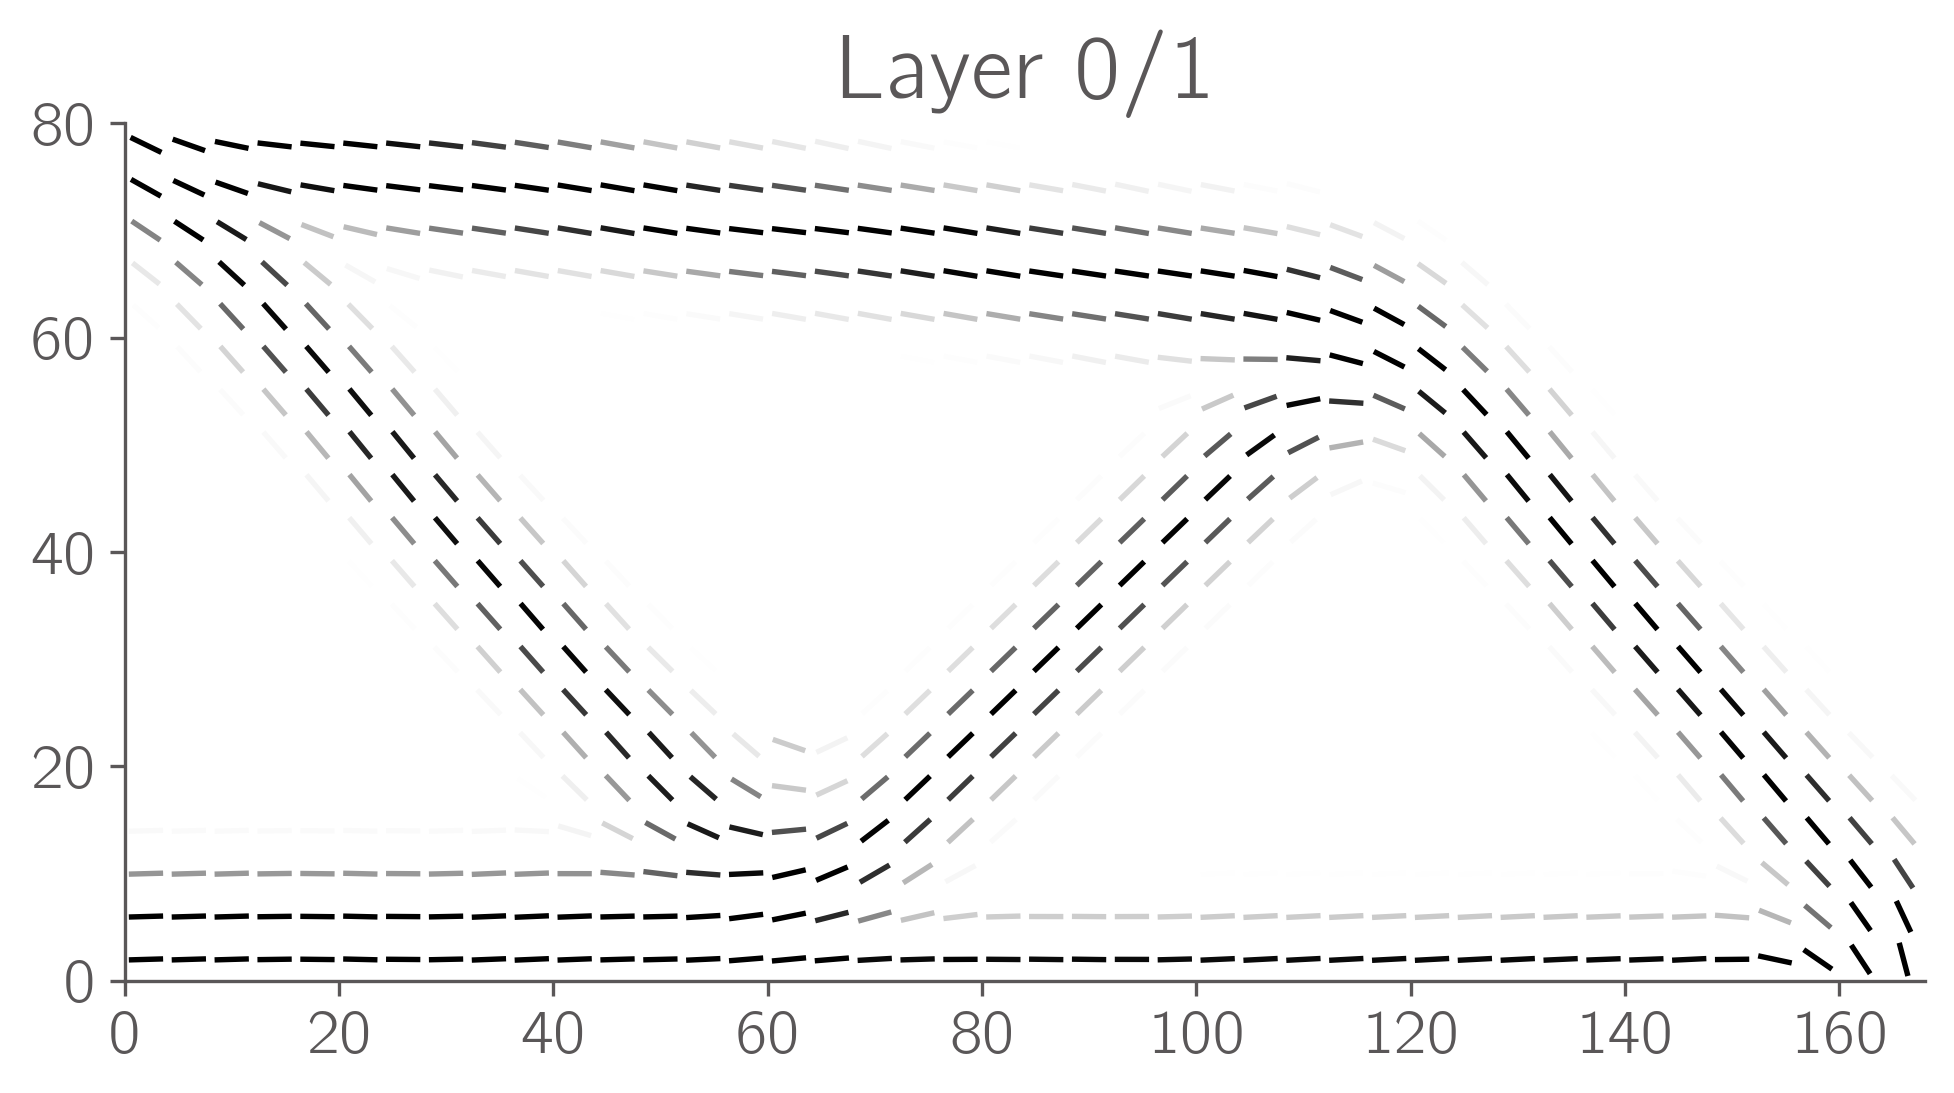

In [5]:
# {t/mm^3, MPa, -, kgCO2/kg}
bamboo    = {'rho': 700e-12, 'E': 17.5e3, 'v': 0.04, 'CO2': 1.0565}
cellulose = {'rho': 990e-12, 'E': 3.25e3, 'v': 0.355, 'CO2': 3.8}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=bamboo, matrix=cellulose, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

solver = TopOpt(inputfile='models/mbb3d.db', res_dir='results/subs/bamboo/', dim='3D_layer', jobname='bamboo', echo=False)
solver.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver.set_volfrac(0.3)
solver.set_filters(r_rho=6, r_theta=10)
solver.set_initial_conditions('random')
solver.set_optim_options(max_iter=200, tol=1e-3, continuation=True)

solver.run()
solver.save()
comp = solver.comp_max_hist[-1]
        
post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.get_mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.get_CO2_footprint(rho, CO2mat, CO2veh)))

# Carbon fiber

Parts with function of providing stiffness, optimization will search for a target compliance of 500 N.mm by varying volfrac

- Traditional composite: HM carbon + epoxy, fiber volume fraction 0.5
- Eco-optimized: hemp + cellulose, fiber volume fraction 0.5

volfrac = 0.2000, compliance = 261.04 N.mm
volfrac = 0.1500, compliance = 341.49 N.mm
volfrac = 0.1250, compliance = 352.05 N.mm
volfrac = 0.1125, compliance = 837.65 N.mm
volfrac = 0.1187, compliance = 379.46 N.mm
volfrac = 0.1156, compliance = 503.29 N.mm

Compliance : 503.29 N.mm
Mass : 20.86 g
CO2 footprint: 2059.98 kgCO2


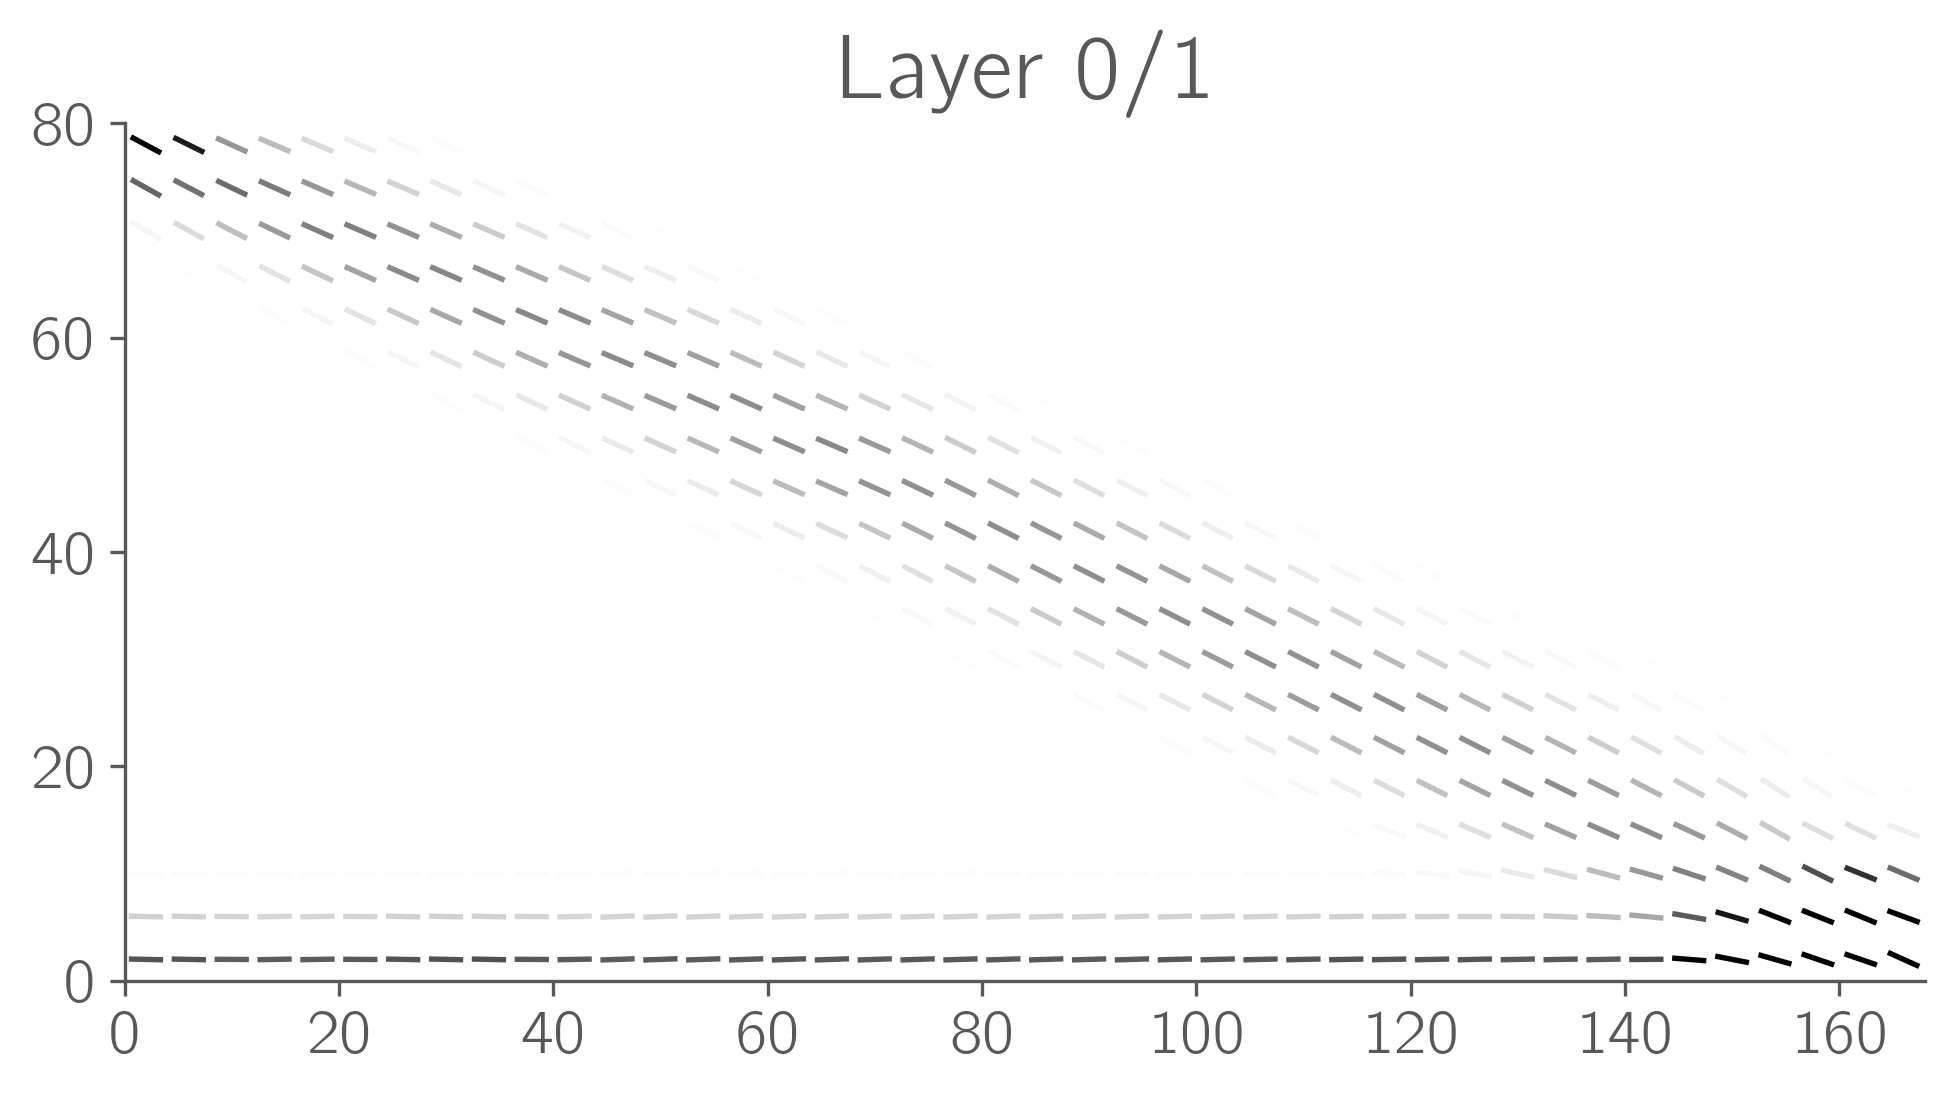

In [9]:
# {t/mm^3, MPa, -, kgCO2/kg}
hmcarbon = {'rho': 2105e-12, 'E': 760e3, 'v': 0.105, 'CO2': 168.1}
epoxy    = {'rho': 1255e-12, 'E': 2.41e3, 'v': 0.399, 'CO2': 5.94}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=hmcarbon, matrix=epoxy, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

volfracmin = 0.1
volfracmax = 0.3

for i in range(7):
    volfrac = (volfracmin+volfracmax)/2

    solver = TopOpt(inputfile='models/mbb3d.db', res_dir='results/subs/carbon/', dim='3D_layer', jobname='carbon', echo=False)
    solver.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
    solver.set_volfrac(volfrac)
    solver.set_filters(r_rho=6, r_theta=10)
    solver.set_initial_conditions('random')
    solver.set_optim_options(max_iter=200, tol=1e-3, continuation=True, move=0.1)

    solver.run()
    comp = solver.comp_max_hist[-1]
    
    print('volfrac = {:.4f}, compliance = {:.2f} N.mm'.format(volfrac,comp))

    if comp < 500:
        volfracmax = volfrac
    else:
        volfracmin = volfrac
    
    if 475 < comp and comp < 525:
        break
        
solver.save()

post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.get_mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.get_CO2_footprint(rho, CO2mat, CO2veh)))

volfrac = 0.3500, compliance = 736.35 N.mm
volfrac = 0.4250, compliance = 502.61 N.mm

Compliance : 502.61 N.mm
Mass : 56.59 g
CO2 footprint: 5581.03 kgCO2


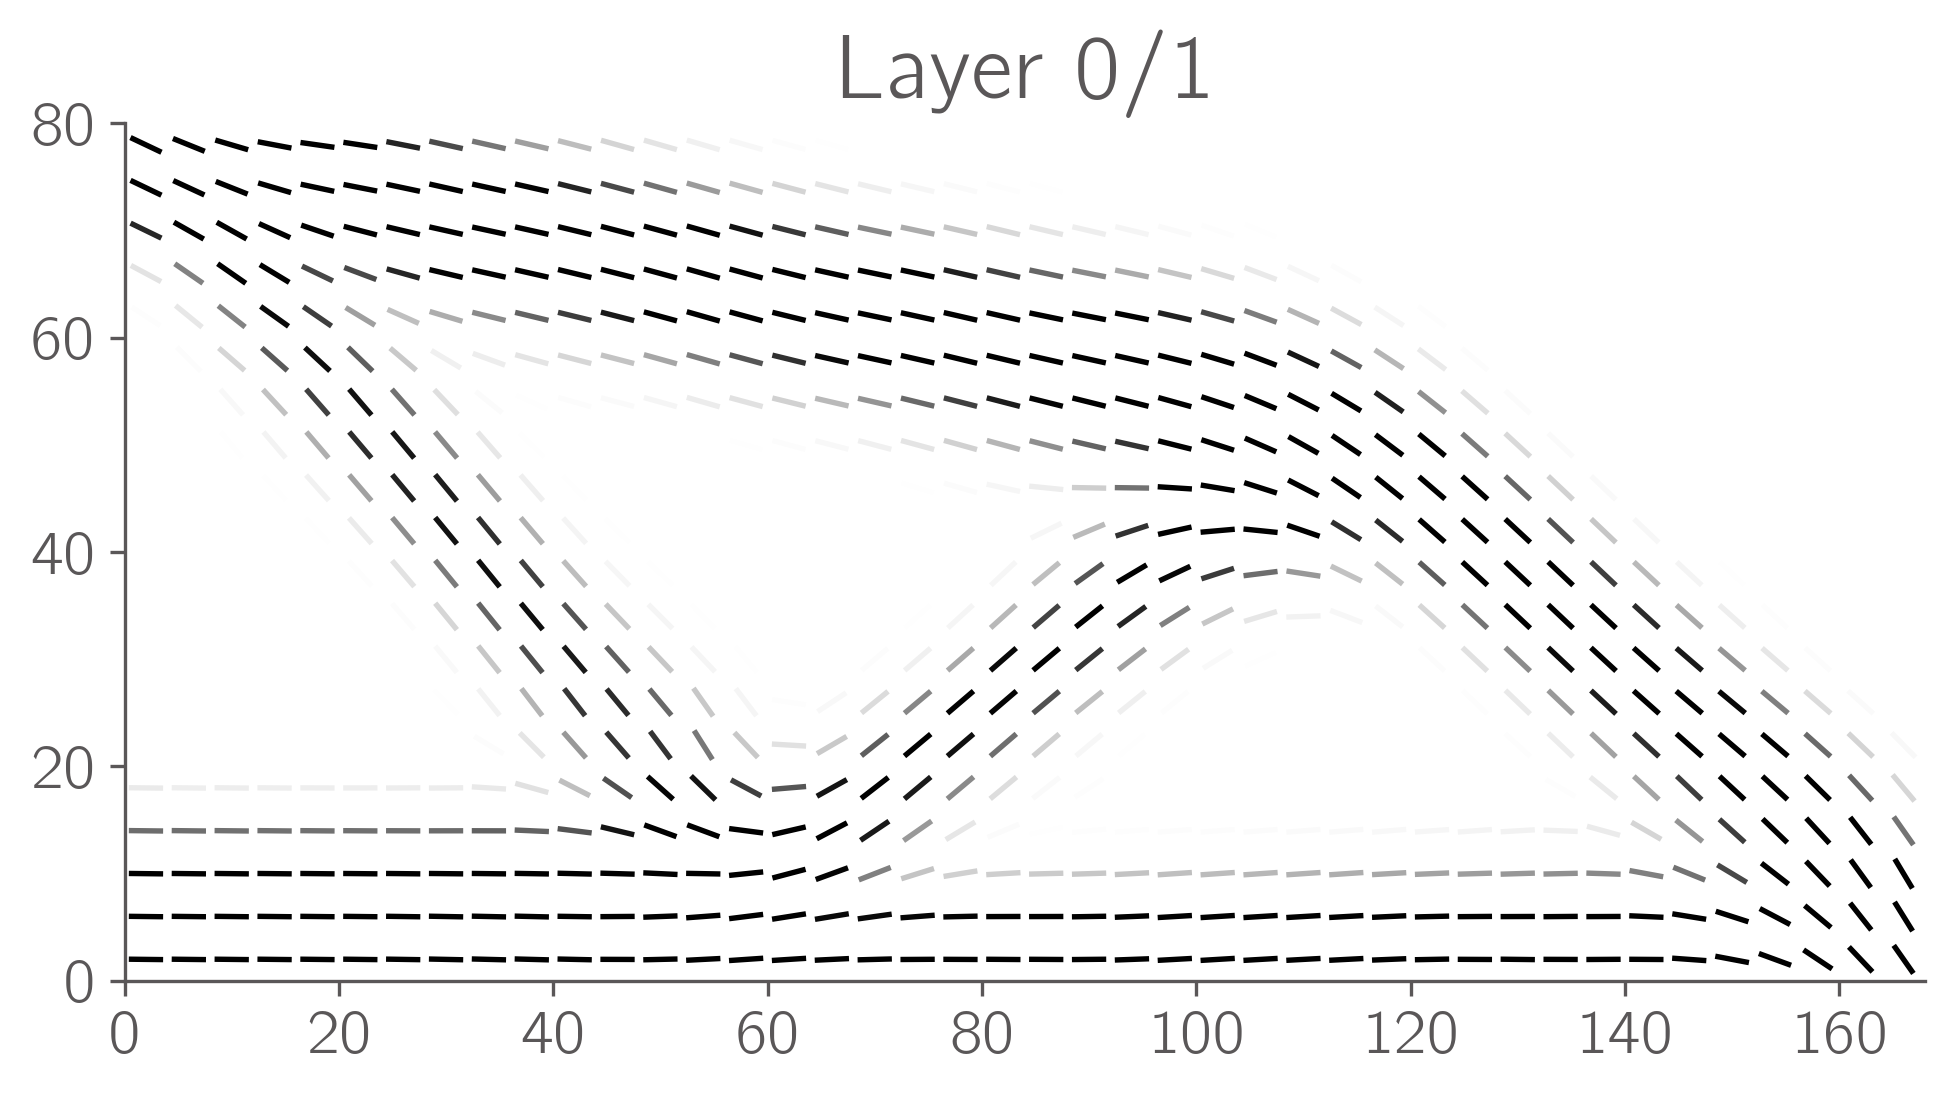

In [10]:
# {t/mm^3, MPa, -, kgCO2/kg}
hemp      = {'rho': 1490e-12, 'E': 62.5e3,  'v': 0.275, 'CO2': 1.6}
cellulose = {'rho': 990e-12,  'E': 3.25e3, 'v': 0.355, 'CO2': 3.8}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=hemp, matrix=cellulose, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

volfracmin = 0.2
volfracmax = 0.5

for i in range(7):
    volfrac = (volfracmin+volfracmax)/2

    solver = TopOpt(inputfile='models/mbb3d.db', res_dir='results/subs/hemp/', dim='3D_layer', jobname='hemp', echo=False)
    solver.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
    solver.set_volfrac(volfrac)
    solver.set_filters(r_rho=6, r_theta=10)
    solver.set_initial_conditions('random')
    solver.set_optim_options(max_iter=200, tol=1e-3, continuation=True)

    solver.run()
    comp = solver.comp_max_hist[-1]
    
    print('volfrac = {:.4f}, compliance = {:.2f} N.mm'.format(volfrac,comp))

    if comp < 500:
        volfracmax = volfrac
    else:
        volfracmin = volfrac
    
    if 475 < comp and comp < 525:
        break
        
solver.save()

post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.get_mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.get_CO2_footprint(rho, CO2mat, CO2veh)))